In [1]:
###Web Scraping 

In [ ]:
!pip install selenium webdriver-manager

In [4]:
from selenium import webdriver
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from selenium.webdriver.edge.service import Service
from bs4 import BeautifulSoup

# Setting up Edge WebDriver
service = Service(EdgeChromiumDriverManager().install())
driver = webdriver.Edge(service=service)

In [5]:
# Steam website for current top 100 games by users
driver.get('https://store.steampowered.com/stats/stats/')

# Get page source and close the driver
html = driver.page_source
driver.quit()

# Parse the HTML with BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

In [9]:
from bs4 import BeautifulSoup

# Assuming 'soup' is already defined and contains the parsed HTML from your web scraping
game_data = []  # Initialize game_data as an empty list before the loop

for row in soup.find_all('tr', class_='player_count_row'):  # Update 'player_count_row' as necessary
    current_players_el = row.find('span', class_='currentServers')  # Update 'currentServers' as necessary
    peak_today_el = row.find('span', class_='maxServers')  # Update 'maxServers' as necessary
    game_name_el = row.find('a', class_='gameLink')  # Update 'gameLink' as necessary

    current_players = current_players_el.get_text(strip=True) if current_players_el else 'N/A'
    peak_today = peak_today_el.get_text(strip=True) if peak_today_el else 'N/A'
    game_name = game_name_el.get_text(strip=True) if game_name_el else 'N/A'
    
    # Append each game's data as a tuple to game_data
    game_data.append((current_players, game_name))

    # Print each row's data to verify output
    print(current_players, game_name)


1,013,172 Counter-Strike 2
555,524 Dota 2
441,095 Path of Exile 2
350,393 Marvel Rivals
229,006 PUBG: BATTLEGROUNDS
187,320 Source SDK Base 2007
164,000 Rust
131,675 Grand Theft Auto V
125,773 HELLDIVERS™ 2
115,491 Call of Duty®
104,543 Warframe
98,149 Banana
88,572 Delta Force
71,238 Team Fortress 2
69,371 War Thunder
68,886 Crosshair X
67,006 THRONE AND LIBERTY
63,219 Baldur's Gate 3
60,814 EA SPORTS FC 25
60,605 Apex Legends
56,166 Wallpaper Engine
55,644 Football Manager 2024
55,351 Farming Simulator 25
54,159 Tom Clancy's Rainbow Six Siege
51,985 Euro Truck Simulator 2
51,258 DayZ
51,195 Hearts of Iron IV
50,498 Stardew Valley
45,411 Sid Meier's Civilization VI
42,339 Crab Game
41,692 Total War: WARHAMMER III
40,433 Dead by Daylight
39,931 Cyberpunk 2077
39,645 Spacewar
37,314 Factorio
36,745 S.T.A.L.K.E.R. 2: Heart of Chornobyl
33,441 The Sims™ 4
32,026 NARAKA: BLADEPOINT
31,372 STALCRAFT: X
31,315 Red Dead Redemption 2
30,927 VRChat
30,339 Phasmophobia
29,841 ELDEN RING
28,778 L

In [13]:
!pip install requests beautifulsoup4 pandas


In [70]:
import pandas as pd
from datetime import datetime

# Load the complete dataset
url = "https://raw.githubusercontent.com/cgvelazquez0414/steam_games/refs/heads/main/gaming_ds_proj_1.csv"
game = pd.read_csv(url)

# List of active games (copy your provided list here)
active_games = [
    "Counter-Strike 2", "Marvel Rivals", "Path of Exile 2", "Dota 2", "PUBG: BATTLEGROUNDS",
    "Call of Duty®", "Banana", "Source SDK Base 2007", "Rust", "Grand Theft Auto V",
    "Baldur's Gate 3", "Wallpaper Engine", "Delta Force", "NARAKA: BLADEPOINT",
    "Stardew Valley", "Team Fortress 2", "Apex Legends", "Tom Clancy's Rainbow Six Siege",
    "THRONE AND LIBERTY", "Crab Game", "Crosshair X", "War Thunder", "Warframe",
    "Sid Meier's Civilization VI", "VRChat", "PAYDAY 2", "Left 4 Dead 2", "Factorio",
    "Cyberpunk 2077", "Red Dead Redemption 2", "DayZ", "Dead by Daylight", "Football Manager 2024",
    "Once Human", "Hearts of Iron IV", "The Sims™ 4", "The Elder Scrolls V: Skyrim Special Edition",
    "Cats", "HELLDIVERS™ 2", "Monster Hunter: World", "EA SPORTS FC 25", "Phasmophobia",
    "Overwatch® 2", "Terraria", "Destiny 2", "ELDEN RING", "Project Zomboid", "The Binding of Isaac: Rebirth",
    "FINAL FANTASY XIV Online", "tModLoader", "Satisfactory", "Don't Starve Together", "Palworld",
    "7 Days to Die", "Rocket League", "RimWorld", "S.T.A.L.K.E.R. 2: Heart of Chornobyl", "Lost Ark",
    "Valheim", "Farming Simulator 25", "ARK: Survival Evolved", "Total War: WARHAMMER III", "Black Myth: Wukong",
    "The First Descendant", "Yu-Gi-Oh! Master Duel", "NBA 2K25", "Spacewar", "Balatro",
    "Killing Floor 2", "Age of Empires II: Definitive Edition", "New World: Aeternum", "ARK: Survival Ascended",
    "Garry's Mod", "Unturned", "Lethal Company", "MIR4", "Fallout 4", "Sid Meier's Civilization V", "SCUM",
    "Crusader Kings III", "THE FINALS", "Mount & Blade II: Bannerlord", "Euro Truck Simulator 2", "Tapple",
    "Warhammer 40,000: Darktide", "Cities: Skylines", "Stellaris", "Governor of Poker 3", "Geometry Dash",
    "Limbus Company", "Forza Horizon 4", "Slay the Spire", "BeamNG.drive", "Enshrouded", "Cookie Clicker",
    "Black Desert", "Fallout 76", "Hogwarts Legacy", "Squad", "Soundpad"
]

# Normalize the game titles for comparison
game['title_normalized'] = game['title'].str.lower().str.strip()
active_games_normalized = [title.lower().strip() for title in active_games]

# Check which games from the dataset are currently active
game['is_active'] = game['title_normalized'].isin(active_games_normalized)

active_games_df = game[game['is_active']]
matching_games = active_games_df['title'].unique()

# Export to Excel
active_games_df.to_excel('active_games.xlsx', index=False)

In [44]:
import requests

# URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_best-selling_PC_games"

# Fetch the webpage
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table containing best-selling PC games
table = soup.find('table', {'class': 'wikitable'})

# Parse the table into a DataFrame
df = pd.read_html(str(table))[0]

# Use correct columns based on actual names
df = df[['Game', 'Total copies sold']]

# Clean the DataFrame
df['Game'] = df['Game'].str.strip()

# Display the first few rows to confirm
print(df.head())
# Save to Excel
df.to_excel('best_selling_pc_games.xlsx', index=False)

                  Game Total copies sold
0  PUBG: Battlegrounds     42 million[1]
1            Minecraft     33 million[2]
2             Terraria     32 million[5]
3           Diablo III  20 million[6][b]
4          Garry's Mod     20 million[7]


C:\Users\13604\AppData\Local\Temp\ipykernel_29604\4265359049.py:14: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


In [46]:

url = "https://raw.githubusercontent.com/cgvelazquez0414/steam_games/refs/heads/main/gaming_ds_proj_1.csv"
game = pd.read_csv(url)

# List of best-selling games 
best_selling_games = [
    "PUBG: Battlegrounds", "Minecraft", "Terraria", "Diablo III", "Garry's Mod", "Stardew Valley", "Rust", "Palworld",
    "Euro Truck Simulator 2", "World of Warcraft", "Half-Life 2", "The Witcher 3: Wild Hunt", "The Sims", "StarCraft",
    "RollerCoaster Tycoon 3", "Fall Guys", "Civilization V", "Cyberpunk 2077", "The Sims 3", "The Sims 2",
    "Cities: Skylines", "StarCraft II: Wings of Liberty", "Guild Wars", "Valheim", "Myst", "Last Ninja 2", "ARMA 3",
    "Satisfactory", "The Forest", "SimCity 3000", "Guild Wars 2", "American Truck Simulator", "The Last Ninja",
    "Diablo II", "DayZ", "Deep Rock Galactic", "Where in the World Is Carmen Sandiego?", "Populous",
    "RollerCoaster Tycoon", "Warhammer 40,000: Dawn of War (including expansions)", "Dark Souls", "Factorio",
    "Dark Souls III", "Mount & Blade: Bannerlord", "Theme Park", "Command & Conquer", "Command & Conquer: Red Alert",
    "Age of Empires", "EverQuest", "Warcraft III: Reign of Chaos", "Civilization IV", "Crysis", "The Binding of Isaac",
    "V Rising", "Dark Souls II", "Lords of the Realm II", "Caesar II", "Caesar III", "Horizon Zero Dawn", "Final Fantasy VII",
    "Grand Theft Auto V", "Doom", "Doom II: Hell on Earth", "Warcraft II: Tides of Darkness", "POD", "Anno 1602",
    "Baldur's Gate", "Baldur's Gate II: Shadows of Amn", "Age of Empires II: The Age of Kings", "Black & White",
    "Civilization III", "Neverwinter Nights", "Stronghold: Crusader", "Mafia: The City of Lost Heaven", "Battlefield 1942",
    "SimCity 4", "Anno 1503", "Counter-Strike: Condition Zero", "Counter-Strike: Source", "Far Cry", "Age of Empires III",
    "Magicka", "Cossacks II: Napoleonic Wars", "Crusader Kings III", "The Witcher", "The Witcher 2: Assassins of Kings",
    "Spore", "SimCity", "Space Engineers", "7 Days to Die", "Planet Coaster", "Stickfight: The Game", "Kenshi",
    "Diablo", "Metal Gear Solid V: The Phantom Pain", "Star Citizen", "Half-Life", "International Karate",
    "Marvel's Spider-Man Remastered", "Sega Mega Drive and Genesis Classics", "Stellaris", "Ultra Street Fighter IV",
    "Riven", "Resident Evil 6", "Monopoly", "Resident Evil 4: Ultimate HD Edition", "Nier: Automata", "SimCity 2000",
    "Pac-Man Championship Edition DX+", "Kingdom Come: Deliverance", "Hydlide", "Tetris", "RoboCop", "Return to Zork",
    "Star Wars: Rebel Assault", "Star Wars Galaxies", "Wing Commander 3: Heart of the Tiger", "Full Throttle",
    "Phantasmagoria", "Daryl F. Gates' Police Quest: SWAT", "Duke Nukem 3D", "Civilization II", "Quake", "Quake II",
    "Grand Prix 2", "Total Annihilation", "Frogger: He's Back!", "Deer Hunter", "Blade Runner", "Unreal", "Unreal Tournament",
    "Commandos: Behind Enemy Lines", "Railroad Tycoon II", "Hidden & Dangerous", "Rimworld", "Command & Conquer: Tiberian Sun",
    "Who Wants to Be a Millionaire?", "American McGee's Alice", "Command & Conquer: Red Alert 2", "Tropico",
    "Operation Flashpoint: Cold War Crisis", "Runaway: A Road Adventure", "Zoo Tycoon", "Stronghold", "Empire Earth",
    "Harry Potter and the Philosopher's Stone", "Return to Castle Wolfenstein", "Dungeon Siege", "Hotel Giant", "Age of Mythology",
    "Vietcong", "The Legend of Sword and Fairy 3", "Hidden & Dangerous 2", "Manor Lords", "Patrician III: Rise of the Hanse",
    "Battlefield Vietnam", "Sacred", "Rome: Total War", "Psychonauts", "Dungeon Lords", "Imperivm: Great Battles of Rome",
    "Glory of the Roman Empire", "Microsoft Flight Simulator X", "Supreme Commander", "Command & Conquer 3: Tiberium Wars",
    "BioShock", "Crysis Warhead", "Warhammer Online: Age of Reckoning", "Killing Floor", "Resident Evil 5", "Machinarium",
    "The Legend of Sword and Fairy 5", "Crusader Kings II", "Prison Architect", "StarCraft II: Heart of the Swarm",
    "Europa Universalis IV", "The Stanley Parable", "Just Survive[h]", "Ark: Survival Evolved", "StarCraft II: Legacy of the Void",
    "Danganronpa: Trigger Happy Havoc", "Danganronpa 2: Goodbye Despair", "Hearts of Iron IV", "Hollow Knight",
    "Divinity: Original Sin II", "Cuphead", "Mordhau"
]
# Normalize titles for comparison
best_selling_normalized = [title.lower().strip() for title in best_selling_games]
game['title_normalized'] = game['title'].str.lower().str.strip()

# Filter matching and non-matching games
matching_games = game[game['title_normalized'].isin(best_selling_normalized)]
non_matching_games = game[~game['title_normalized'].isin(best_selling_normalized)]

# Export to Excel
matching_games.to_excel('matching_best_selling_games.xlsx', index=False)
non_matching_games.to_excel('non_matching_games.xlsx', index=False)


In [48]:
#####best_selling_active are the games from top current steam games and top games of all time (1 million sold)
#non_active_games are games that didn't meet either list

import pandas as pd


best_selling_active = pd.read_excel('best_selling_active.xlsx')
non_active_games = pd.read_excel('non_active_games.xlsx')


In [50]:
# Calculate average review scores
average_review_active = best_selling_active['overall_review_%'].mean()
average_review_non_active = non_active_games['overall_review_%'].mean()

print(f"Average review score for best-selling active games: {average_review_active:.2f}%")
print(f"Average review score for non-active games: {average_review_non_active:.2f}%")


Average review score for best-selling active games: 85.00%
Average review score for non-active games: 77.72%


In [58]:
from collections import Counter

def count_genres(dataframe):
    genre_counter = Counter()
    # Define genres to exclude
    excluded_genres = {'Utilities', 'Software Training', 'Game Development', 'Education', 'Audio Production'}
    
    for genres in dataframe['genres']:
        if pd.notna(genres):  # Check if the genre cell is not NaN
            genres_list = genres.split(', ')
            filtered_genres = [genre.strip() for genre in genres_list if genre.strip() not in excluded_genres]
            for genre in filtered_genres:
                genre_counter[genre] += 1
    return genre_counter


In [60]:
def count_genres(dataframe):
    genre_counter = Counter()
    for genres in dataframe['genres']:
        if pd.notna(genres):  # Check if the genre cell is not NaN
            for genre in genres.split(', '):  # Split genres and strip any extra whitespace
                genre_counter[genre.strip()] += 1
    return genre_counter

# Load your datasets if not already done
best_selling_active = pd.read_excel('best_selling_active.xlsx')
non_active_games = pd.read_excel('non_active_games.xlsx')

# Count genres in each dataset
genres_active = count_genres(best_selling_active)
genres_non_active = count_genres(non_active_games)


In [62]:
# Count genres in each dataset
genres_active = count_genres(best_selling_active)
genres_non_active = count_genres(non_active_games)

# Convert genre counts to DataFrame
df_genres_active = pd.DataFrame(list(genres_active.items()), columns=['Genre', 'Count_Active'])
df_genres_non_active = pd.DataFrame(list(genres_non_active.items()), columns=['Genre', 'Count_Non_Active'])

# Merge the two dataframes on genre and fill missing values with zero
df_genre_comparison = pd.merge(df_genres_active, df_genres_non_active, on='Genre', how='outer').fillna(0)

# Normalize counts by total number of games in each dataset for fair comparison
df_genre_comparison['Pct_Active'] = (df_genre_comparison['Count_Active'] / len(best_selling_active)) * 100
df_genre_comparison['Pct_Non_Active'] = (df_genre_comparison['Count_Non_Active'] / len(non_active_games)) * 100


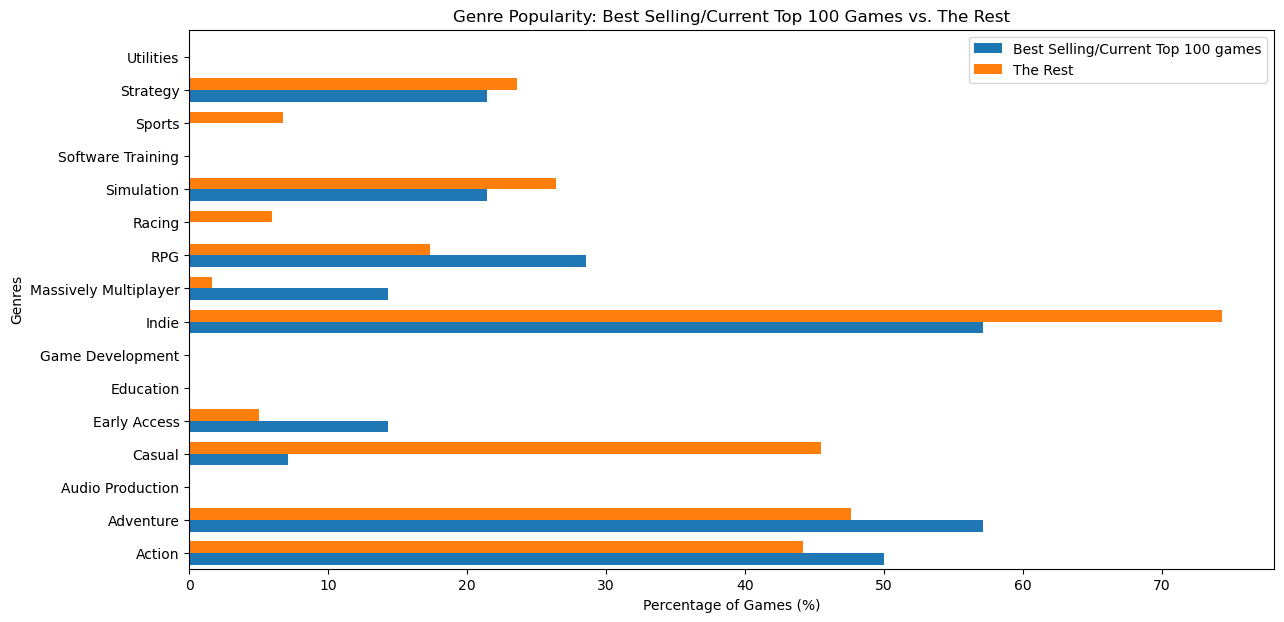

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 7))
width = 0.35  # Bar width
indices = range(len(df_genre_comparison['Genre']))

ax.barh(indices, df_genre_comparison['Pct_Active'], width, label='Best Selling/Current Top 100 games')
ax.barh([i + width for i in indices], df_genre_comparison['Pct_Non_Active'], width, label='The Rest')

ax.set(yticks=[i + width/2 for i in indices], yticklabels=df_genre_comparison['Genre'], ylim=[2*width - 1, len(df_genre_comparison)])
ax.legend()

plt.title('Genre Popularity: Best Selling/Current Top 100 Games vs. The Rest')
plt.xlabel('Percentage of Games (%)')
plt.ylabel('Genres')

plt.savefig('genre_popularity_comparison.png', dpi=300, bbox_inches='tight')  # Adjust the filename and dpi as needed

plt.show()


In [36]:
def count_categories(dataframe):
    category_counter = Counter()
    # Define categories to exclude (if there are any specific ones you want to exclude)
    excluded_categories = {'Utilities', 'Software Training', 'Game Development', 'Education', 'Audio Production'}  # Adjust as necessary
    
    for categories in dataframe['categories']:
        if pd.notna(categories):  # Check if the category cell is not NaN
            categories_list = categories.split(', ')
            filtered_categories = [category.strip() for category in categories_list if category.strip() not in excluded_categories]
            for category in filtered_categories:
                category_counter[category] += 1
    return category_counter


In [38]:
# Count categories in each dataset
categories_active = count_categories(best_selling_active)
categories_non_active = count_categories(non_active_games)

# Convert category counts to DataFrame
df_categories_active = pd.DataFrame(list(categories_active.items()), columns=['Category', 'Count_Active'])
df_categories_non_active = pd.DataFrame(list(categories_non_active.items()), columns=['Category', 'Count_Non_Active'])

# Merge the two dataframes on category and fill missing values with zero
df_category_comparison = pd.merge(df_categories_active, df_categories_non_active, on='Category', how='outer').fillna(0)

# Normalize counts by total number of games in each dataset for fair comparison
df_category_comparison['Pct_Active'] = (df_category_comparison['Count_Active'] / len(best_selling_active)) * 100
df_category_comparison['Pct_Non_Active'] = (df_category_comparison['Count_Non_Active'] / len(non_active_games)) * 100


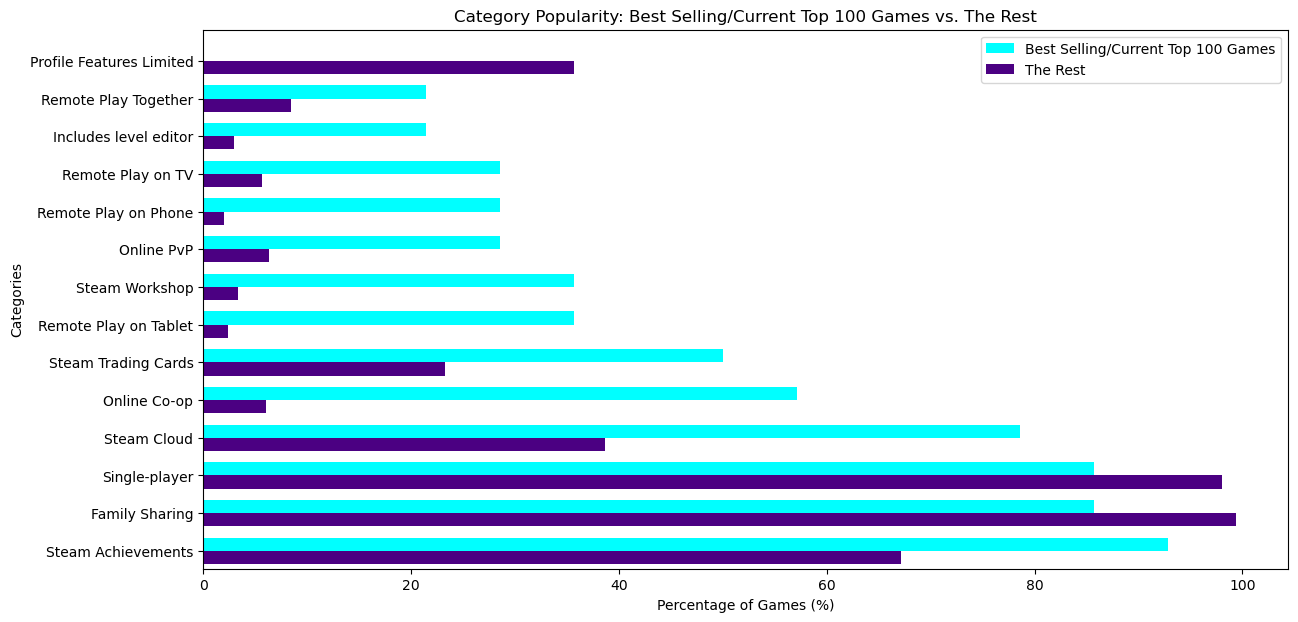

In [64]:
# Normalize counts by total number of games in each dataset for fair comparison
df_category_comparison['Pct_Active'] = (df_category_comparison['Count_Active'] / len(best_selling_active)) * 100
df_category_comparison['Pct_Non_Active'] = (df_category_comparison['Count_Non_Active'] / len(non_active_games)) * 100

# Filter categories where both active and non-active are less than 20%
df_filtered_categories = df_category_comparison[(df_category_comparison['Pct_Active'] > 20) | (df_category_comparison['Pct_Non_Active'] > 20)]

# Sorting data for better visualization
df_filtered_categories = df_filtered_categories.sort_values(by='Pct_Active', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))
width = 0.35  # Bar width
indices = range(len(df_filtered_categories['Category']))

ax.barh([i + width for i in indices], df_filtered_categories['Pct_Active'], width, label='Best Selling/Current Top 100 Games', color='cyan')
ax.barh(indices, df_filtered_categories['Pct_Non_Active'], width, label='The Rest', color='indigo')

ax.set(yticks=[i + width/2 for i in indices], yticklabels=df_filtered_categories['Category'], ylim=[2 * width - 1, len(df_filtered_categories)])
ax.legend()

plt.title('Category Popularity: Best Selling/Current Top 100 Games vs. The Rest')
plt.xlabel('Percentage of Games (%)')
plt.ylabel('Categories')

plt.savefig('category_popularity_comparison.png', dpi=300, bbox_inches='tight')

plt.show()
